# Домашнее задание «Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок»

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
</div>

In [2]:
sigma = 15 #225**0.5
z = 1.96  #95%
delta = 3
n_min = ((sigma * z) / delta)**2
print(f'Минимально необходимый объем выборки для построения интервальной оценки среднего = {int(n_min)}.')

Минимально необходимый объем выборки для построения интервальной оценки среднего = 96.


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 12$.
</div>

In [3]:
m = 130
sigma = 12
n = 25
z = 2.33  #98%
delta = sigma * z / n**0.5
interval = (m - delta, m + delta)
print(f'98% доверительный интервал для среднего значения = {interval}.')

98% доверительный интервал для среднего значения = (124.408, 135.592).


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

<div class="alert alert-success">
<h4> В задании были ошибки: loc=19, scale=171..</h4>
</div>

In [4]:
# population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
# population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

In [5]:
# исправил на:
population_men = stats.norm.rvs(loc=171, scale=19, size=110000) # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=165, scale=16, size=12000) # Выборка женщин со средним ростом 165

In [6]:
stats.ttest_ind(a=population_men, b=population_women, equal_var=False).pvalue

2.3828440802775694e-308

pvalue меньше уровня значимости 0.001 => отвергаем нулевую гипотезу о равенстве средних двух выборок.

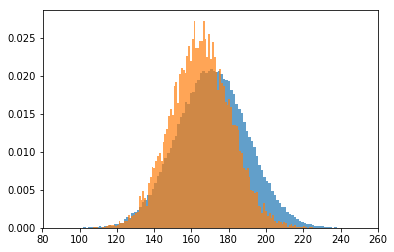

In [7]:
plt.hist(population_men, density=True, bins=120, alpha=0.7);
plt.hist(population_women, density=True, bins=120, alpha=0.7);

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [8]:
sigma = 150
z = 1.96  #95%
delta = 50
n_min = ((sigma * z) / delta)**2
print(f'Минимально необходимый объем выборки для исследования среднего чека за кофе = {int(n_min)}.')

Минимально необходимый объем выборки для исследования среднего чека за кофе = 34.


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [9]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


В задаче похоже не хватает данных, потому что не сказано сколько именно раз волшебник угадал дождь из 10 ответов. Он мог ни разу не угадать, а мог 10 из 15-ти. В итоге в худшем для него случае он угадал погоду 24 раза из 49 (49%), т.е. с тем же успехом можно было кидать монетку.  
В лучшем случае он угадал 44 из 49 (90%). Вероятность этого уже крайне мала если он действительно гадал (<<5%).  
Можно посчитать по формуле Бернулли:

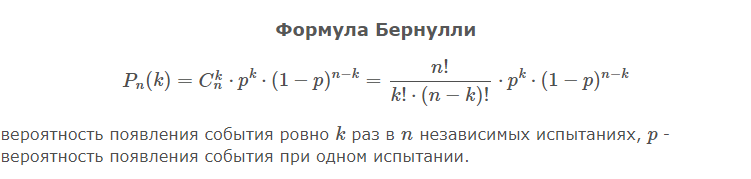

In [10]:
f = lambda x: math.factorial(x)
f(49) / (f(44) * f(49-44)) * 0.5**44 * 0.5**(49-44)

3.3873064353429072e-09

В этом случае можно сказать, что маг действительно умеет предсказывать погоду.

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [11]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [12]:
def mean_confidence_interval(data, confidence):   
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2, n)
    return (m - h, m + h)

In [13]:
print(f'90% доверительный интервал для среднего значения = = {mean_confidence_interval(data, 0.90)}')

90% доверительный интервал для среднего значения = = (6.074074746111319, 7.183068111031539)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [14]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

Нулевой гипотезой будет, что средние и дисперсии для двух групп равны (выборки из одного множества).  
Используем стандартное пороговое значение 0.05.

In [15]:
stats.ttest_ind(a=data_1, b=data_2, equal_var=True).pvalue

2.1159475572725764e-11

pvalue меньше уровня значимости 0.05 => отвергаем нулевую гипотезу.

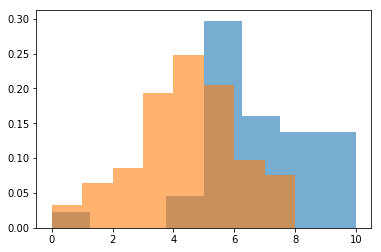

In [16]:
plt.hist(data_1, density=True, bins=8, alpha=0.6);
plt.hist(data_2, density=True, bins=8, alpha=0.6);

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

P-значение - это по сути частота, с которой случайная модель приводит к результату, более предельному, чем наблюдаемый; и вывод будет зависеть от порога (уровня значимости), который необходимо установить заранее - до теста. И если к примеру порог был установлен в стандарные 5%, то есть основания отвергнуть нулевую гипотезу и считать распределение не нормальным.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [17]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A + stats.norm.rvs(scale=10,loc=-7.5,size=300)

Нулевая гипотеза: Нет значимого различия эффективности препаратов А и B, различия являются чисто случайными.  
Альтернативная гипотеза: Имеется значимое различие эффективности препаратов А и B.

In [18]:
alpha = 0.05
pvalue = stats.ttest_ind(a=A, b=B, equal_var=False).pvalue
pvalue

0.05995260332765237

In [19]:
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


При pvalue в диапазоне [0, 0.05) различия были бы уже значимы.  
pvalue_min = 0 (если был подвох :)

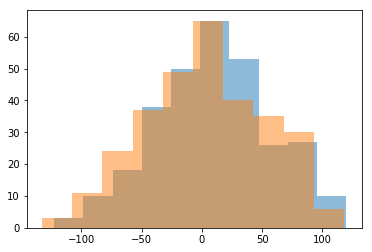

In [20]:
plt.hist(A, alpha=0.5);
plt.hist(B, alpha=0.5);